# A partir de un problema de regresión voy a tratar de encontrar el modelo que mas eficacia tenga a la hora de predecir la puntuación de las películas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Cargo los datos

In [3]:
df = pd.read_csv(r"..\data\processed\peliculas_analisis_ML.csv",index_col=0)
df.head()

,puntuacion,total_premios,razzie,director,guion,musica,fotografia,reparto_1,reparto_2,reparto_3,...,drama,fantastico,infantil,intriga,musical,romance,terror,thriller,western,pais
0,6.7,0,0,4,0,0,0,5,1,0,...,1,0,0,0,0,0,0,0,0,5178
1,7.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5178
2,6.5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5178
3,4.7,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,0,175
4,5.1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5178


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
puntuacion,10128.0,5.974743,1.130100,3.7,5.1,6.2,6.8,9.0
total_premios,10128.0,0.685920,2.244859,0.0,0.0,0.0,0.0,35.0
razzie,10128.0,0.022117,0.278779,0.0,0.0,0.0,0.0,10.0
director,10128.0,0.645241,1.385445,0.0,0.0,0.0,1.0,10.0
guion,10128.0,0.288803,0.880107,0.0,0.0,0.0,0.0,9.0
musica,10128.0,0.757998,2.359718,0.0,0.0,0.0,0.0,17.0
fotografia,10128.0,0.495853,1.333195,0.0,0.0,0.0,0.0,11.0
reparto_1,10128.0,1.473341,2.493218,0.0,0.0,0.0,2.0,19.0
reparto_2,10128.0,1.053416,2.077640,0.0,0.0,0.0,1.0,19.0
reparto_3,10128.0,0.744767,1.772630,0.0,0.0,0.0,1.0,19.0


## Separo la columna "target" de los "features" y particiono en train y test

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('puntuacion', axis=1)
y = df['puntuacion']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15,
                                                    random_state=42)

## Escalo los datos previamente. StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection

### Obtengo la media del target para tener una referencia en cuanto a la métrica MAE

In [9]:
df["puntuacion"].mean()

5.974743285939968

### Compruebo mediante el Feature Importances que columnas son mas importantes para el modelo

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

seed = 42

RndFrst_Model = RandomForestRegressor(random_state= seed)
RndFrst_Model.fit(X_train, y_train)

feature_importances = RndFrst_Model.feature_importances_

df_Feat_Import = pd.DataFrame({'column': X.columns, 'score': feature_importances}).sort_values('score', ascending=False)
df_Feat_Import.rename(columns={"score":"Feat_Import"},inplace=True)
df_Feat_Import.head()

,column,Feat_Import
12,year,0.234898
19,drama,0.144383
28,pais,0.094264
0,total_premios,0.081676
2,director,0.054695


### Compruebo mediante el SelectKBest que columnas son mas importantes para el modelo

In [11]:
from sklearn.feature_selection import SelectKBest

# Separar características y objetivo
X = df.drop('puntuacion', axis=1)
y = df['puntuacion']

# Seleccionar las 10 mejores características
sel = SelectKBest(k=10)
X_new = sel.fit_transform(X, y)

# Imprimir la forma de X_new y los puntajes de todas las características
df_SelectKBest = pd.DataFrame({'column': X.columns, 'score': sel.scores_}).sort_values('score', ascending=False)
df_SelectKBest.rename(columns={"score":"Select_KBest"}, inplace= True)
df_SelectKBest.head()

,column,Select_KBest
12,year,68.270571
19,drama,39.608074
2,director,25.560473
0,total_premios,20.967556
11,duracion,16.959625


### Visualizo la comparativa en un dataframe

In [12]:
df_features = pd.merge(df_SelectKBest, df_Feat_Import, left_on="column", right_on="column")
df_features.head()

,column,Select_KBest,Feat_Import
0,year,68.270571,0.234898
1,drama,39.608074,0.144383
2,director,25.560473,0.054695
3,total_premios,20.967556,0.081676
4,duracion,16.959625,0.046710


### Muestro en un dataframe las columnas más importantes y su porcentaje sobre el total en el Select KBest

In [13]:
total_kbest = df_features['Select_KBest'].sum()
total_feat_import = df_features['Feat_Import'].sum()

df_features['Select_KBest %'] = (df_features['Select_KBest'] / total_kbest) * 100
df_features['Feat_Import %'] = (df_features['Feat_Import'] / total_feat_import) * 100
df_select_KBest =df_features.sort_values(by="Select_KBest %", ascending= False).iloc[:,[0,1,3]]
df_select_KBest.head()

,column,Select_KBest,Select_KBest %
0,year,68.270571,25.724929
1,drama,39.608074,14.924658
2,director,25.560473,9.631403
3,total_premios,20.967556,7.900753
4,duracion,16.959625,6.390530


## Visualizo en una gráfica de barras mismo resultado

In [14]:
import plotly.express as px
import pandas as pd
import numpy as np

colors = ["#86A0B1", "#FEE28F", "#FFB144", "#FFFFFF"]


df_KBest = pd.DataFrame({
    'column': ['Año', 'Drama', 'Director', 'Premios'],
    'Select_KBest': [68.270571, 39.608074, 25.560473, 20.967556],
    'Select_KBest %': [25.724929, 14.924658, 9.631403, 7.900753]
})

fig = px.bar(
    df_KBest, 
    x='column', 
    y='Select_KBest %', 
    text=None,
    width=10
)

fig.update_traces(
    marker_color=np.tile(colors, 2), # repeat the color palette for each bar
    textposition='auto',
    textfont=dict(size=16),
)

# set the size of the chart
fig.update_layout(
    width=500,
    height=500
)

# remove the axes
fig.update_xaxes(showticklabels=True, 
                 tickfont=dict(size=20, color='white'),
                 title=None
                 )

fig.update_yaxes(showticklabels=True,
                 title=None,
                 tickfont=dict(size=20, color='white')
                 )

# set the background color to transparent
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

# # set the y axis tick values and labels
y_tickvals = [0, 5, 10, 15, 20, 25]
y_ticktext = ['0%', '5%', '10%', '15%', '20%', '25%']
fig.update_layout(yaxis={'tickvals': y_tickvals, 'ticktext': y_ticktext, 'showticklabels': True})


fig.write_image('select_k_best.png')

# show the chart
# fig.show()

In [15]:
df_select_KBest = pd.DataFrame({
    'column': ['year', 'drama', 'director', 'total_premios', 'duracion', 'terror', 'comedia', 'pais', 'guion', 'accion', 'cine negro', 'reparto_1', 'fotografia', 'musica', 'western', 'razzie', 'reparto_4', 'thriller', 'ciencia ficcion', 'reparto_2', 'infantil', 'romance', 'belico', 'intriga', 'reparto_3', 'reparto_5', 'fantastico', 'aventuras', 'musical'],
    'Select_KBest': [68.270571, 39.608074, 25.560473, 20.967556, 16.959625, 12.766236, 11.151253, 8.863364, 7.451181, 6.325492, 5.428509, 4.423287, 4.142718, 3.846031, 2.864087, 2.831693, 2.587299, 2.584808, 2.581842, 2.539733, 2.342012, 1.861715, 1.749711, 1.513346, 1.506185, 1.417109, 1.213879, 1.045425, 0.983604],
    'Select_KBest %': [25.724929, 14.924658, 9.631403, 7.900753, 6.39053, 4.810426, 4.201887, 3.339791, 2.807668, 2.383499, 2.045508, 1.666732, 1.561011, 1.449217, 1.079212, 1.067006, 0.974916, 0.973977, 0.97286, 0.956993, 0.88249, 0.70151, 0.659306, 0.570242, 0.567543, 0.533979, 0.4574, 0.393925, 0.37063]
})

## Visualizo en una gráfica de pie pero con todas las columnas

In [16]:
import plotly.express as px

colors = ["#86A0B1", "#FEE28F", "#FFB144", "#FFFFFF"]

fig = px.pie(df_select_KBest, values='Select_KBest %', names='column',
             hole=0.4, opacity=1,
             color_discrete_sequence=colors)


fig.update_traces(textposition='inside',
                #   textinfo='percent+label'
                  textinfo='none')

fig.update_layout(showlegend=False,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)')

fig.write_image('pie_select_k_best_100.png')

# fig.show()

## Muestro en un dataframe las columnas más importantes y su porcentaje sobre el total en el feature importance

In [17]:
total_kbest = df_features['Select_KBest'].sum()
total_feat_import = df_features['Feat_Import'].sum()

df_features['Select_KBest %'] = (df_features['Select_KBest'] / total_kbest) * 100
df_features['Feat_Import %'] = (df_features['Feat_Import'] / total_feat_import) * 100
df_features_importances = df_features.sort_values(by="Feat_Import %", ascending= False).iloc[:,::2]
df_features_importances.head()

,column,Feat_Import,Feat_Import %
0,year,0.234898,23.489831
1,drama,0.144383,14.438292
7,pais,0.094264,9.426434
3,total_premios,0.081676,8.167604
2,director,0.054695,5.469463


## Visualizo en una gráfica de barras mismo resultado

In [18]:
import plotly.express as px
import pandas as pd
import numpy as np

colors = ["#86A0B1", "#FEE28F", "#FFB144", "#FFFFFF"]


df_Feat_Importances = pd.DataFrame({
    'column': ['Año', 'Drama', 'Pais', 'Premios'],
    'Feat_Import': [0.234898, 0.144383, 0.094264, 0.081676],
    'Feat_Import %': [23.489831, 14.438292, 9.426434, 8.167604]
})

fig = px.bar(
    df_Feat_Importances, 
    x='column', 
    y='Feat_Import %', 
    text=None,
    width=10
)


fig.update_traces(
    marker_color=np.tile(colors, 2), # repeat the color palette for each bar
    textposition='auto',
    textfont=dict(size=16),
)

# set the size of the chart
fig.update_layout(
    width=500,
    height=500
)

# remove the axes
fig.update_xaxes(showticklabels=True, 
                 tickfont=dict(size=20, color='white'),
                 title=None
                 )

fig.update_yaxes(showticklabels=True,
                 title=None,
                 tickfont=dict(size=20, color='white')
                 )

# set the background color to transparent
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

# set the y axis tick values and labels
y_tickvals = [0, 5, 10, 15, 20, 25]
y_ticktext = ['0%', '5%', '10%', '15%', '20%', '25%']
fig.update_layout(yaxis={'tickvals': y_tickvals, 'ticktext': y_ticktext, 'showticklabels': True})


fig.write_image('features_importances.png')

# show the chart
# fig.show()

## Visualizo en una gráfica de pie mismo resultado

In [19]:
import plotly.express as px

colors = ["#86A0B1", "#FEE28F", "#FFB144", "#FFFFFF"]

fig = px.pie(df_Feat_Importances, values='Feat_Import %', names='column',
             hole=0.4, opacity=1,
             color_discrete_sequence=colors)


fig.update_traces(textposition='inside',
                #   textinfo='percent+label'
                  textinfo='none')

fig.update_layout(showlegend=False,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)')

fig.write_image('pie_features_importances.png')

# fig.show()

### Visualizo gráficamente las más importantes/ menos importantes de ambos métodos

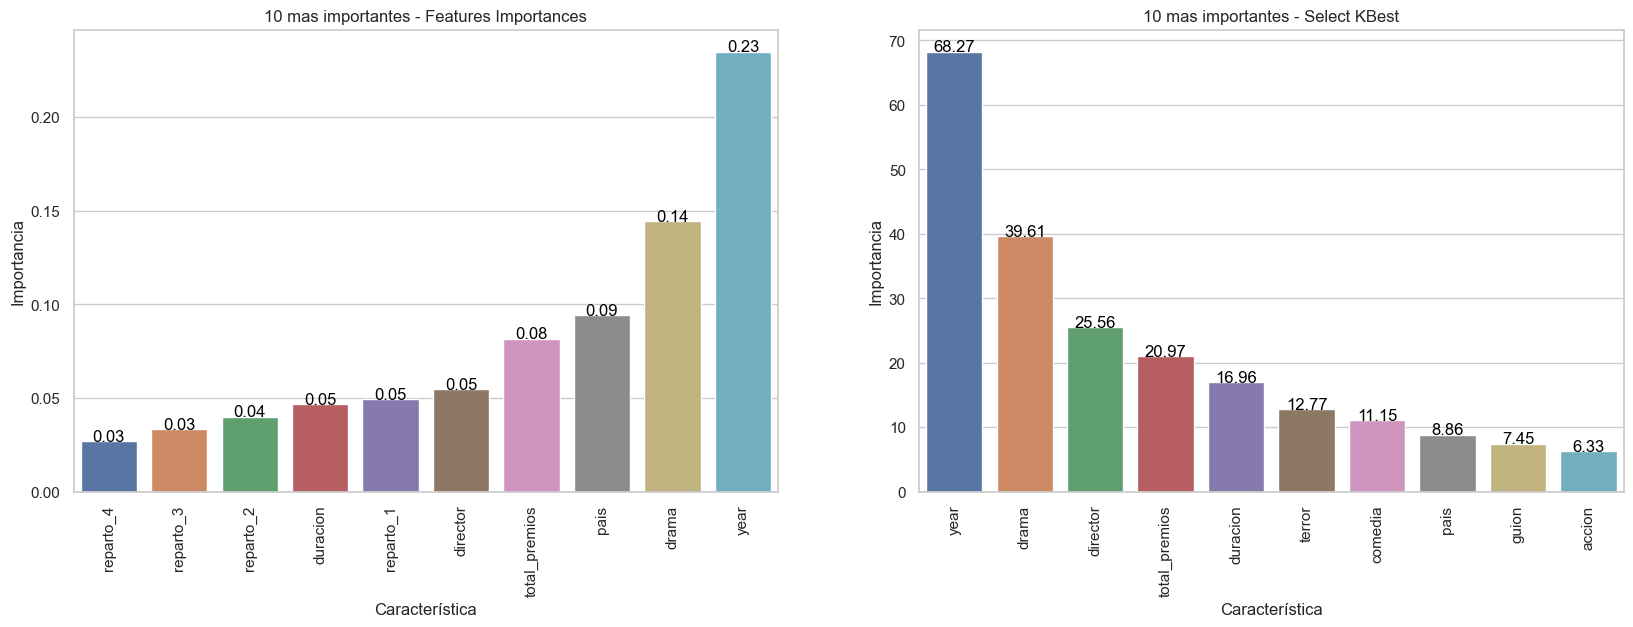

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo global
sns.set_theme(style='whitegrid')

# Obtener las características menos importantes
feature_importances = RndFrst_Model.feature_importances_
important_features = sorted(zip(feature_importances, df.columns[1:]), reverse=True)[:10]
important_features_names = [f[1] for f in important_features][::-1]
important_features_importances = [f[0] for f in important_features][::-1]

# Crear el gráfico de barras 1
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

sns.barplot(x=important_features_names, y=important_features_importances, ax=ax1)
ax1.set_title('10 mas importantes - Features Importances')
ax1.set_xlabel('Característica')
ax1.set_ylabel('Importancia')
ax1.set_xticklabels(labels=important_features_names, rotation=90)

# Agregar etiquetas a las barras
for i, v in enumerate(important_features_importances):
    ax1.text(i, v, str(round(v, 2)), color='black', ha='center')

# Ordenar el dataframe por score en orden ascendente
df_SelectKBest_sorted = df_SelectKBest.sort_values(by='Select_KBest', ascending=False)

# Crear el gráfico de barras 2
sns.barplot(data=df_SelectKBest_sorted.head(10), x='column', y='Select_KBest', ax=ax2)
ax2.set_title('10 mas importantes - Select KBest')
ax2.set_xlabel('Característica')
ax2.set_ylabel('Importancia')
ax2.set_xticklabels(labels=df_SelectKBest_sorted['column'].head(10), rotation=90)

# Agregar etiquetas a las barras
for i, v in enumerate(df_SelectKBest_sorted['Select_KBest'].head(10)):
    ax2.text(i, v, str(round(v, 2)), color='black', ha='center')

# plt.show()

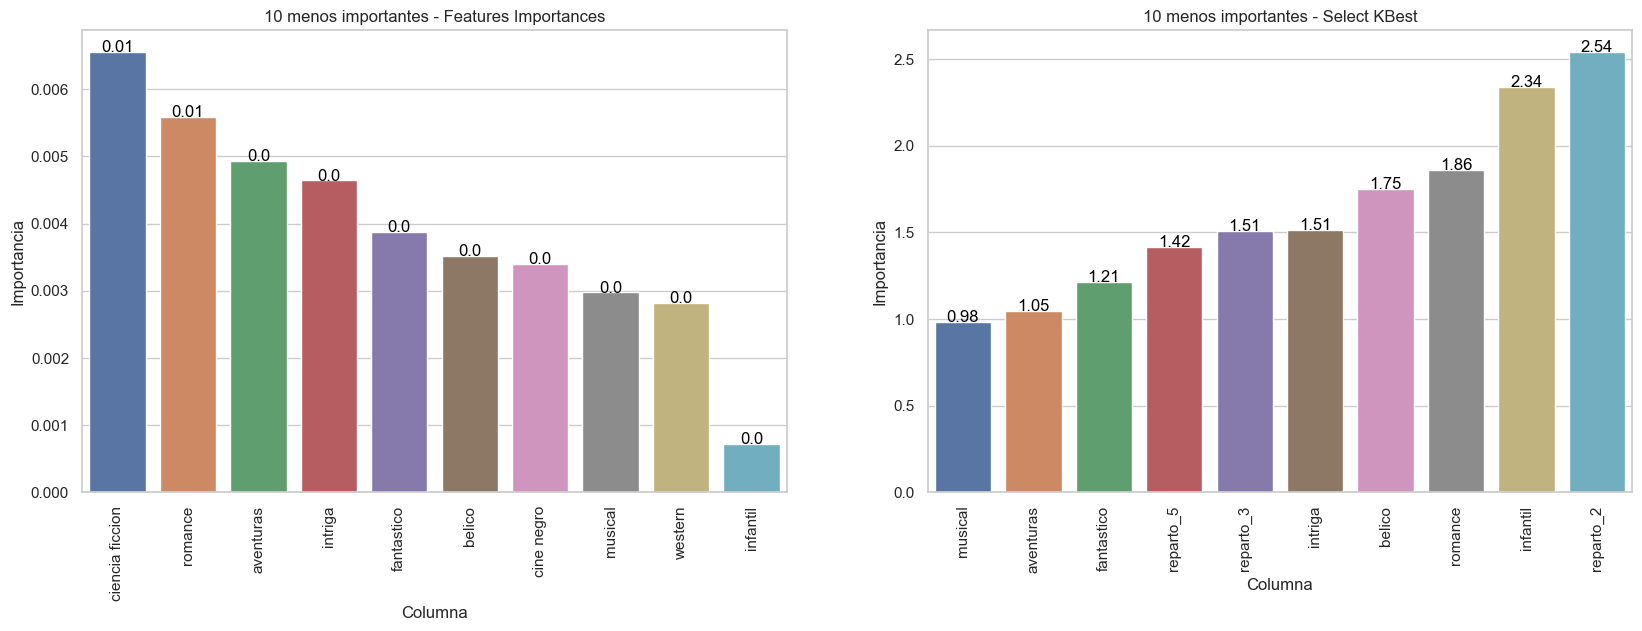

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo global
sns.set_theme(style='whitegrid')

# Obtener las características menos importantes
feature_importances = RndFrst_Model.feature_importances_
important_features = sorted(zip(feature_importances, df.columns[1:]), reverse=False)[:10]
important_features_names = [f[1] for f in important_features][::-1]
important_features_importances = [f[0] for f in important_features][::-1]

# Crear el gráfico de barras 1
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

sns.barplot(x=important_features_names, y=important_features_importances, ax=ax1)
ax1.set_title('10 menos importantes - Features Importances')
ax1.set_xlabel('Columna')
ax1.set_ylabel('Importancia')
ax1.set_xticklabels(labels=important_features_names, rotation=90)

# Agregar etiquetas a las barras
for i, v in enumerate(important_features_importances):
    ax1.text(i, v, str(round(v, 2)), color='black', ha='center')

# Ordenar el dataframe por score en orden ascendente
df_SelectKBest_sorted = df_SelectKBest.sort_values(by='Select_KBest', ascending=True)

# Crear el gráfico de barras 2
sns.barplot(data=df_SelectKBest_sorted.head(10), x='column', y='Select_KBest', ax=ax2)
ax2.set_title('10 menos importantes - Select KBest')
ax2.set_xlabel('Columna')
ax2.set_ylabel('Importancia')
ax2.set_xticklabels(labels=df_SelectKBest_sorted['column'].head(10), rotation=90)

# Agregar etiquetas a las barras
for i, v in enumerate(df_SelectKBest_sorted['Select_KBest'].head(10)):
    ax2.text(i, v, str(round(v, 2)), color='black', ha='center')

# plt.show()

# Comienzo a probar modelos para ver su performance

# 1. Regression Algorithms

### OrthogonalMatchingPursuit

In [22]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

OrthogonalMP_Model = OrthogonalMatchingPursuit(n_nonzero_coefs= 20, tol= 1.2)
OrthogonalMP_Model.fit(X_train, y_train)

y_pred_OrthogonalMP_Model = OrthogonalMP_Model.predict(X_test)

R2_y_pred_OrthogonalMP_Model = r2_score(y_test, y_pred_OrthogonalMP_Model)
MAE_y_pred_OrthogonalMP_Model = mean_absolute_error(y_test, y_pred_OrthogonalMP_Model)

print("R2 (test):", round(((R2_y_pred_OrthogonalMP_Model)*100),4),"%")
print("MAE (test):", MAE_y_pred_OrthogonalMP_Model)

R2 (test): 48.5093 %
MAE (test): 0.638511097316851


### RANSACRegressor

In [23]:
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

RANSAC_Model = RANSACRegressor(random_state=42, min_samples= 1 ,residual_threshold= 100)
RANSAC_Model.fit(X_train, y_train)

y_pred_RANSAC_Model = RANSAC_Model.predict(X_test)

R2_y_pred_RANSAC_Model = r2_score(y_test, y_pred_RANSAC_Model)
MAE_y_pred_RANSAC_Model = mean_absolute_error(y_test, y_pred_RANSAC_Model)

print("R2 (test):", round(((R2_y_pred_RANSAC_Model)*100),4),"%")
print("MAE (test):", MAE_y_pred_RANSAC_Model)

R2 (test): 48.5745 %
MAE (test): 0.6379019374416337


### HuberRegressor

In [24]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score, mean_absolute_error

Huber_Model = HuberRegressor(epsilon = 1.5, alpha = 0.5)
Huber_Model.fit(X_train, y_train)

y_pred_Huber_Model = Huber_Model.predict(X_test)

R2_Huber_Model = r2_score(y_test, y_pred_Huber_Model)
MAE_Huber_Model = mean_absolute_error(y_test, y_pred_Huber_Model)

print("R2 (test):", round(((R2_Huber_Model)*100),4),"%")
print("MAE (test):", MAE_Huber_Model)

R2 (test): 48.3754 %
MAE (test): 0.6361573614088634


### LARS

In [25]:
from sklearn.linear_model import Lars
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

Lars_Model = Lars(fit_intercept= True, random_state=seed)
Lars_Model.fit(X_train, y_train)

y_pred_Lars_Model = Lars_Model.predict(X_test)

R2_Lars_Model = r2_score(y_test, y_pred_Lars_Model)
MAE_Lars_Model = mean_absolute_error(y_test, y_pred_Lars_Model)

print("R2 (test):", round(((R2_Lars_Model)*100),4),"%")
print("MAE (test):", MAE_Lars_Model)

R2 (test): 48.5093 %
MAE (test): 0.638511097316851


### LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

LinReg_Model = LinearRegression()
LinReg_Model.fit(X_train, y_train)

y_pred_LinReg_Model = LinReg_Model.predict(X_test)

R2_LinReg_Model = r2_score(y_test, y_pred_LinReg_Model)
MAE_LinReg_Model = mean_absolute_error(y_test, y_pred_LinReg_Model)

print("R2 (test):", round(((R2_LinReg_Model)*100),4),"%")
print("MAE (test):", MAE_LinReg_Model)

R2 (test): 48.591 %
MAE (test): 0.6377916251447975


# 2. Regularization Algorithms

### Ridge

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

Ridge_Model = Ridge(random_state=seed)
Ridge_Model.fit(X_train, y_train)

y_pred_Ridge_Model = Ridge_Model.predict(X_test)

R2_Ridge_Model = r2_score(y_test, y_pred_Ridge_Model)
MAE_Ridge_Model = mean_absolute_error(y_test, y_pred_Ridge_Model)

print("R2 (test):", round(((R2_Ridge_Model)*100),4),"%")
print("MAE (test):", MAE_Ridge_Model)

R2 (test): 48.5094 %
MAE (test): 0.6385139528232114


### Lasso

In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

Lasso_Model = Lasso(alpha = 10, max_iter= 100000, random_state=seed)
Lasso_Model.fit(X_train, y_train)

y_pred_Lasso_Model = Lasso_Model.predict(X_test)

R2_Lasso_Model = r2_score(y_test, y_pred_Lasso_Model)
MAE_Lasso_Model = mean_absolute_error(y_test, y_pred_Lasso_Model)

print("R2 (test):", round(((R2_Lasso_Model)*100),4),"%")
print("MAE (test):", MAE_Lasso_Model)

R2 (test): -0.0562 %
MAE (test): 0.9448887204069655


### ElasticNet

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

ElasticNet_Model = ElasticNet(alpha = 10, l1_ratio= 0.5, random_state=seed)
ElasticNet_Model.fit(X_train, y_train)

y_pred_ElasticNet_Model = ElasticNet_Model.predict(X_test)

R2_ElasticNet_Model = r2_score(y_test, y_pred_ElasticNet_Model)
MAE_ElasticNet_Model = mean_absolute_error(y_test, y_pred_ElasticNet_Model)

print("R2 (test):", round(((R2_ElasticNet_Model)*100),4),"%")
print("MAE (test):", MAE_ElasticNet_Model)

R2 (test): -0.0562 %
MAE (test): 0.9448887204069655


### BayesianRidge

In [30]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score, mean_absolute_error

Bayesian_Model = BayesianRidge(n_iter = 5000)
Bayesian_Model.fit(X_train, y_train)

y_pred_Bayesian_Model = Bayesian_Model.predict(X_test)

R2_Bayesian_Model = r2_score(y_test, y_pred_Bayesian_Model)
MAE_Bayesian_Model = mean_absolute_error(y_test, y_pred_Bayesian_Model)

print("R2 (test):", round(((R2_Bayesian_Model)*100),4),"%")
print("MAE (test):", MAE_Bayesian_Model)

R2 (test): 48.5133 %
MAE (test): 0.6386409979998462


# 3. Tree Based Models

### RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

seed = 42

RndFrst_Model = RandomForestRegressor(random_state= seed)
RndFrst_Model.fit(X_train, y_train)                          

y_pred_RndFrst_Model = RndFrst_Model.predict(X_test)
         
R2_RndFrst_Model = r2_score(y_test, y_pred_RndFrst_Model)
MAE_RndFrst_Model = mean_absolute_error(y_test, y_pred_RndFrst_Model)

print("R2 (test):", round(((R2_RndFrst_Model)*100),4),"%")
print("MAE (test):", MAE_RndFrst_Model)

R2 (test): 52.268 %
MAE (test): 0.5870193596824616


### DecisionTreeRegressor

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

DcsTree_Model = DecisionTreeRegressor(random_state= seed)
DcsTree_Model.fit(X_train, y_train)

y_pred_DcsTree_Model = DcsTree_Model.predict(X_test)

R2_DcsTree_Model = r2_score(y_test, y_pred_DcsTree_Model)
MAE_DcsTree_Model = mean_absolute_error(y_test, y_pred_DcsTree_Model)

print("R2 (test):", round(((R2_DcsTree_Model)*100),4),"%")
print("MAE (test):", MAE_DcsTree_Model)

R2 (test): 17.5807 %
MAE (test): 0.7553901548900895


### CatBoostRegressor

In [33]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

CatBoost_Model = CatBoostRegressor(random_state= seed, verbose = False, learning_rate= 0.1, max_depth= 8, n_estimators= 300)
CatBoost_Model.fit(X_train, y_train)

y_pred_CatBoost_Model = CatBoost_Model.predict(X_test)

R2_CatBoost_Model = r2_score(y_test, y_pred_CatBoost_Model)
MAE_CatBoost_Model = mean_absolute_error(y_test, y_pred_CatBoost_Model)

print("R2 (test):", round(((R2_CatBoost_Model)*100),4),"%")
print("MAE (test):", MAE_CatBoost_Model)

R2 (test): 58.3686 %
MAE (test): 0.5642408424792049


### Light GBM

In [34]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error


lgb_train = lgb.Dataset(X_train, y_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05
}

num_round = 100
LGBM_Model = lgb.train(params, lgb_train, num_boost_round=num_round)

y_pred_LGBM_Model = LGBM_Model.predict(X_test)

R2_LGBM_Model= r2_score(y_test, y_pred_LGBM_Model)
MAE_LGBM_Model = mean_absolute_error(y_test, y_pred_LGBM_Model)

print("R2 (test):", round(((R2_LGBM_Model)*100),4),"%")
print("MAE (test):", MAE_LGBM_Model)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 8608, number of used features: 28
[LightGBM] [Info] Start training from score 5.978671
R2 (test): 58.388 %
MAE (test): 0.5650050693225112


### GradientBoostingRegressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

GradBoost_Model = GradientBoostingRegressor(random_state= seed, verbose = False, learning_rate= 0.1, max_depth= 8, n_estimators= 300)
GradBoost_Model.fit(X_train, y_train)

y_pred_GradBoost_Model = GradBoost_Model.predict(X_test)

R2_GradBoost_Model = r2_score(y_test, y_pred_GradBoost_Model)
MAE_GradBoost_Model = mean_absolute_error(y_test, y_pred_GradBoost_Model)

print("R2 (test):", round(((R2_GradBoost_Model)*100),4),"%")
print("MAE (test):", MAE_GradBoost_Model)

R2 (test): 54.5947 %
MAE (test): 0.5832691403009419


### XGBRegressor

In [36]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

XGBBoost_Model = XGBRegressor(random_state=seed, learning_rate= 0.1, max_depth= 8, n_estimators= 300)
XGBBoost_Model.fit(X_train, y_train)

y_pred_XGBBoost_Model = XGBBoost_Model.predict(X_test)

R2_XGBBoost_Model = r2_score(y_test, y_pred_XGBBoost_Model)
MAE_XGBBoost_Model = mean_absolute_error(y_test, y_pred_XGBBoost_Model)

print("R2 (test):", round(((R2_XGBBoost_Model)*100),4),"%")
print("MAE (test):", MAE_XGBBoost_Model)

R2 (test): 55.6065 %
MAE (test): 0.5792470183184272


### AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

AdaBoost_Model = AdaBoostRegressor(random_state= seed, learning_rate= 0.1, n_estimators= 150)
AdaBoost_Model.fit(X_train, y_train)

y_pred_AdaBoost_Model = AdaBoost_Model.predict(X_test)

R2_AdaBoost_Model = r2_score(y_test, y_pred_AdaBoost_Model)
MAE_AdaBoost_Model = mean_absolute_error(y_test, y_pred_AdaBoost_Model)

print("R2 (test):", round(((R2_AdaBoost_Model)*100),4),"%")
print("MAE (test):", MAE_AdaBoost_Model)

R2 (test): 47.4691 %
MAE (test): 0.658111875618868


# 4. Misc - Models

### KNeighborsRegressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

KNN_Model = KNeighborsRegressor()
KNN_Model.fit(X_train, y_train)

y_pred_KNN_Model = KNN_Model.predict(X_test)

R2_KNN_Model = r2_score(y_test, y_pred_KNN_Model)
MAE_KNN_Model = mean_absolute_error(y_test, y_pred_KNN_Model)

print("R2 (test):", round(((R2_KNN_Model)*100),4),"%")
print("MAE (test):", MAE_KNN_Model)

R2 (test): 43.1269 %
MAE (test): 0.6498552631578948


### Support Vector Machine

In [39]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

SupVecMac_Model = SVR()
SupVecMac_Model.fit(X_train, y_train)

y_pred_SupVecMac_Model = SupVecMac_Model.predict(X_test)

R2_SupVecMac_Model= r2_score(y_test, y_pred_SupVecMac_Model)
MAE_SupVecMac_Model = mean_absolute_error(y_test, y_pred_SupVecMac_Model)

print("R2 (test):", round(((R2_SupVecMac_Model)*100),4),"%")
print("MAE (test):", MAE_SupVecMac_Model)

R2 (test): 52.084 %
MAE (test): 0.5953772013556841


# 5. Neural Networks and Deep Learning

### MLP Regressor

In [40]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

MLP_Model = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=seed)
MLP_Model.fit(X_train, y_train)

y_pred_MLP_Model = MLP_Model.predict(X_test)

R2_MLP_Model = r2_score(y_test, y_pred_MLP_Model)
MAE_SupVecMac_Model = mean_absolute_error(y_test, y_pred_MLP_Model)

print("R2 (test):", round(((R2_MLP_Model)*100),4),"%")
print("MAE (test):", MAE_SupVecMac_Model)

R2 (test): 51.8805 %
MAE (test): 0.611054317627869


# Optimización de modelos

### Comparo las métricas de todos los modelos en un DataFrame

In [41]:
import types

pred_lista = []

# Obtener copia del espacio de nombres de usuario
user_ns = dict(get_ipython().user_ns)

# Obtener variables definidas en las celdas del notebook
notebook_vars = []
for var_name, var_value in user_ns.items():
    # Excluir variables internas del entorno y módulos importados
    if not var_name.startswith('_') and not isinstance(var_value, types.ModuleType) and var_name.startswith('y_pred'):
        notebook_vars.append(var_name)

for var in notebook_vars:
    pred_lista.append(var)

models_list = []
for model in pred_lista:
    models_list.append(model.split("_Model")[0].split("y_pred_")[1]+" ")

In [42]:
pred_lista = [y_pred_OrthogonalMP_Model, y_pred_RANSAC_Model, y_pred_Huber_Model, y_pred_Lars_Model, y_pred_LinReg_Model, y_pred_Ridge_Model, y_pred_Lasso_Model, y_pred_ElasticNet_Model,
 y_pred_Bayesian_Model, y_pred_RndFrst_Model, y_pred_DcsTree_Model, y_pred_CatBoost_Model, y_pred_LGBM_Model, y_pred_GradBoost_Model, y_pred_XGBBoost_Model, y_pred_AdaBoost_Model,
 y_pred_KNN_Model, y_pred_SupVecMac_Model,y_pred_MLP_Model]

rmse_metric = []
mse_metric = []
r2_metric = []
mae_metric = []

def metrics(y_true, lista_pred):

    from sklearn.metrics import mean_squared_error

    for pred in lista_pred:
        r2_metric.append(r2_score(y_true, pred))
        mse_metric.append(mean_squared_error(y_true, pred, squared=True))
        rmse_metric.append(mean_squared_error(y_true, pred, squared=False))
        mae_metric.append(mean_absolute_error(y_true, pred))

metrics(y_test, pred_lista)

In [43]:
df_metrics_14 = pd.DataFrame({'RMSE': rmse_metric, 'MSE': mse_metric, 'R2_SCORE': r2_metric, 'MAE': mae_metric}, index=models_list)
df_metrics_14 = df_metrics_14.sort_values('R2_SCORE', ascending=False).reset_index().iloc[:-2,:]
df_metrics_14.rename(columns = {"index":"Modelos"}, inplace =True)
df_metrics_14.head(14)

,Modelos,RMSE,MSE,R2_SCORE,MAE
0,LGBM,0.712171,0.507187,0.583880,0.565005
1,CatBoost,0.712337,0.507424,0.583686,0.564241
2,XGBBoost,0.735588,0.541090,0.556065,0.579247
3,GradBoost,0.743923,0.553422,0.545947,0.583269
4,RndFrst,0.762746,0.581781,0.522680,0.587019
5,SupVecMac,0.764214,0.584024,0.520840,0.595377
6,MLP,0.765836,0.586504,0.518805,0.611054
7,LinReg,0.791580,0.626598,0.485910,0.637792
8,RANSAC,0.791706,0.626799,0.485745,0.637902
9,Bayesian,0.792178,0.627546,0.485133,0.638641


### Muestro en una gráfica los resultados de las performance de los modelos

In [44]:
import plotly.express as px
import pandas as pd

colors = ['#86A0B1', '#FEE28F', '#FFB144', '#FFFFFF']

fig = px.bar(df_metrics_14[::-1],
             x='R2_SCORE',
             y='Modelos',
             color='R2_SCORE', # add color parameter
             orientation='h',
             barmode='group',
            #  color_discrete_sequence=colors,
             height=500,
             title=None)

fig.update_traces(
    marker_color=np.tile(colors, 5),
    textfont=dict(size=16),
)

fig.update_xaxes(showticklabels=True, 
                 tickfont=dict(size=20, color='white'),
                 title="R2 Score",
                 title_font=dict(size=18, color='white'))

fig.update_yaxes(showticklabels=True,
                 title=None,
                 tickfont=dict(size=20, color='white'))


# set the background color to transparent
fig.update_layout(
    width=900,
    height=700,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)')


fig.write_image('model_metrics_14.png')

fig.show()

### Voting

In [45]:
from sklearn.ensemble import VotingRegressor

estimators = [('ridge', Ridge_Model), 
              ('lin_reg', LinReg_Model), 
              ('huber', Huber_Model), 
              ('cat', CatBoost_Model), 
              ('svm', SupVecMac_Model),
              ('red_neu',MLP_Model),
              ]

Voting_Model = VotingRegressor(estimators=estimators)
Voting_Model

VotingRegressor(estimators=[('ridge', Ridge(random_state=42)),
                            ('lin_reg', LinearRegression()),
                            ('huber', HuberRegressor(alpha=0.5, epsilon=1.5)),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x000001E1D80BEDF0>),
                            ('svm', SVR()),
                            ('red_neu', MLPRegressor(random_state=42))])

In [46]:
from sklearn.metrics import r2_score

model_list = [Ridge_Model, LinReg_Model, Huber_Model, CatBoost_Model, SupVecMac_Model, MLP_Model, Voting_Model]

for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__, r2_score(y_test, y_pred))


Ridge 0.4850938185642766
LinearRegression 0.48590996512450524
HuberRegressor 0.48375430368931804
CatBoostRegressor 0.5836861900636945
SVR 0.5208400938430394
MLPRegressor 0.5188048379852576
VotingRegressor 0.5474836565637731


In [47]:
y_pred_Voting_Model = Voting_Model.predict(X_test)

R2_Voting_Model = r2_score(y_test, y_pred_Voting_Model)
MAE_Voting_Model = mean_absolute_error(y_test, y_pred_Voting_Model)

print("R2 (test):", round(((R2_Voting_Model)*100),4),"%")
print("MAE (test):", MAE_Voting_Model)

R2 (test): 54.7484 %
MAE (test): 0.5933921196086617


### Combino las predicciones ponderando en función de la precisión (R2 score) de los 3 mejores modelos

In [48]:
best_models = [SupVecMac_Model, CatBoost_Model, LGBM_Model]
best_metrics = [R2_SupVecMac_Model, R2_CatBoost_Model, R2_LGBM_Model]
best_predictions = [y_pred_SupVecMac_Model, y_pred_CatBoost_Model, y_pred_LGBM_Model]

In [49]:
y_pred_SVM_CAT_LGBM = (R2_SupVecMac_Model * y_pred_SupVecMac_Model + R2_CatBoost_Model * y_pred_CatBoost_Model + R2_LGBM_Model * y_pred_LGBM_Model) / (R2_SupVecMac_Model + R2_CatBoost_Model + R2_LGBM_Model)

R2_SVM_CAT_LGBM_Model = r2_score(y_test, y_pred_SVM_CAT_LGBM)
MAE_SVM_CAT_LGBM_Model = mean_absolute_error(y_test, y_pred_SVM_CAT_LGBM)

print("R2 (test):", round(((R2_SVM_CAT_LGBM_Model)*100),4),"%")
print("MAE (test):", MAE_SVM_CAT_LGBM_Model)

R2 (test): 58.3217 %
MAE (test): 0.5646057730796867


### Combino las predicciones ponderando en función de la precisión (RMSE) de los 2 mejores modelos

In [50]:
from sklearn.metrics import mean_squared_error

RMSE_CatBoost_Model = mean_squared_error(y_test, y_pred_CatBoost_Model) 
RMSE_LGB_Model = mean_squared_error(y_test, y_pred_LGBM_Model)

y_pred_CAT_LGBM_Model = (y_pred_LGBM_Model / RMSE_CatBoost_Model*2 + y_pred_CatBoost_Model / RMSE_LGB_Model*2) / (1 / RMSE_CatBoost_Model*2 + 1 / RMSE_LGB_Model*2)

R2_CAT_LGBM_Model = r2_score(y_test, y_pred_CAT_LGBM_Model)
MAE_CAT_LGBM_Model = mean_absolute_error(y_test, y_pred_CAT_LGBM_Model)

print("R2 (test):", round(((R2_CAT_LGBM_Model)*100),4),"%")
print("MAE (test):", MAE_CAT_LGBM_Model)

R2 (test): 58.8847 %
MAE (test): 0.5614763082073367


### Bagging

In [51]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score

seed = 42

# Entrenamos un ensamblaje de árboles de decisión utilizando la técnica de bagging
Bagging_Model = BaggingRegressor(base_estimator=CatBoost_Model, n_estimators=10, random_state=seed)
Bagging_Model.fit(X_train, y_train)

# Hacemos una predicción con el árbol de decisión y el ensamblaje de árboles de decisión
y_pred_Bagging_Model = Bagging_Model.predict(X_test)

# Medimos la precisión de los modelos utilizando el coeficiente de determinación R^2
R2_Bagging_Model = r2_score(y_test, y_pred_Bagging_Model)
MAE_Bagging_Model = mean_absolute_error(y_test, y_pred_Bagging_Model)

print("R2 (test):", round(((R2_Bagging_Model)*100),4),"%")
print("MAE (test):", MAE_Bagging_Model)

R2 (test): 59.0069 %
MAE (test): 0.5593462432702482


### GridSearch

Algunas recomendaciones sobre los hiperparámetros que se pueden ajustar en CatBoost y los rangos de valores que podrías probar. Lista de los hiperparámetros y los rangos sugeridos:

- learning_rate: tasa de aprendizaje, controla la velocidad a la que se adapta el modelo a los datos. Valores típicos son ```[0.01, 0.03, 0.1, 0.3, 1]```.
- max_depth: profundidad máxima del árbol. Un valor demasiado alto puede provocar sobreajuste. Valores típicos son ```[3, 5, 7, 9, 11]```, -1 (sin límite de profundidad).
- l2_leaf_reg: parámetro de regularización L2. Ayuda a prevenir el sobreajuste. Valores típicos son ```[1, 3, 5, 7, 9]```.
- colsample_bylevel: porcentaje de características que se toman en cuenta para cada árbol. Valores típicos son ```[0.5, 0.7, 0.8, 1]```.
- subsample: porcentaje de muestras que se toman en cuenta para cada árbol. Valores típicos son ```[0.5, 0.7, 0.8, 1]```.
- iterations: número de iteraciones del modelo. Valores típicos son ```[500, 1000, 2000]```.

El valor para el parámetro cv en GridSearchCV depende del tamaño de tus datos y del tiempo se esté dispuesto a esperar para que el modelo se ajuste. En general, se recomienda usar un valor de cv entre 5 y 10 para conjuntos de datos de tamaño moderado a grande.

Dado que el conjunto de datos es de unos 10,000 registros, un valor de cv de 5 sería razonable. Esto significa que los datos se dividirían en 5 partes iguales y se ajustarían 5 modelos separados, cada uno de los cuales se ajusta en 4 partes y se evalúa en la restante.

In [52]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[100, 150, 200],
              'max_depth': [3, 5, 7, 9, 11],
              'learning_rate': [0.01, 0.03, 0.1, 0.3, 1],
            }

GridSearch_model = GridSearchCV(CatBoost_Model, param_grid= parameters, cv= 5)
GridSearch_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001E1D80BEDF0>,
             param_grid={'learning_rate': [0.01, 0.03, 0.1, 0.3, 1],
                         'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 150, 200]})

In [53]:
GridSearch_model.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error

Best_GridSearch_model = GridSearch_model.best_estimator_
y_pred_Best_GridSearch_model = Best_GridSearch_model.predict(X_test)

R2_Best_GridSearch_model = r2_score(y_test, y_pred_Best_GridSearch_model)
MAE_Best_GridSearch_model = mean_absolute_error(y_test, y_pred_Best_GridSearch_model)

print("R2 (test):", round(((R2_Best_GridSearch_model)*100),4),"%")
print("MAE (test):", MAE_Best_GridSearch_model)

R2 (test): 58.4622 %
MAE (test): 0.5633614175408322


In [55]:
import types

pred_lista_optimazed = []

# Obtener copia del espacio de nombres de usuario
user_ns = dict(get_ipython().user_ns)

# Obtener variables definidas en las celdas del notebook
notebook_vars = []
for var_name, var_value in user_ns.items():
    # Excluir variables internas del entorno y módulos importados
    if not var_name.startswith('_') and not isinstance(var_value, types.ModuleType) and var_name.startswith('y_pred'):
            notebook_vars.append(var_name)

for var in notebook_vars:
    if var not in pred_lista:
        pred_lista_optimazed.append(var)

In [56]:
pred_lista_01 = [y_pred_CatBoost_Model, y_pred_LGBM_Model, y_pred_Voting_Model, y_pred_SVM_CAT_LGBM, y_pred_CAT_LGBM_Model, y_pred_Bagging_Model, y_pred_Best_GridSearch_model, y_pred_SupVecMac_Model]
models_lista_01 = ['CatBoost ', 'LGBM ', 'Voting ','SVM_CAT_LGBM ','CAT_LGBM ','Bagging ','GridSearch ', 'SVM']

rmse_metric_01 = []
mse_metric_01 = []
r2_metric_01 = []
mae_metric_01 = []

def metrics(y_true, lista_pred):

    from sklearn.metrics import mean_squared_error

    for pred in lista_pred:
        r2_metric_01.append(r2_score(y_true, pred))
        mse_metric_01.append(mean_squared_error(y_true, pred, squared=True))
        rmse_metric_01.append(mean_squared_error(y_true, pred, squared=False))
        mae_metric_01.append(mean_absolute_error(y_true, pred))

metrics(y_test, pred_lista_01)

### Muestro en un dataframe los resultados

In [57]:
df_metrics_8 = pd.DataFrame({'RMSE': rmse_metric_01, 'MSE': mse_metric_01, 'R2_SCORE': r2_metric_01, 'MAE': mae_metric_01}, index=models_lista_01)
df_metrics_8 = df_metrics_8.sort_values('MAE', ascending=True).reset_index().iloc[:-2,:]
df_metrics_8.rename(columns = {"index":"Modelos"}, inplace =True)
df_metrics_8

,Modelos,RMSE,MSE,R2_SCORE,MAE
0,Bagging,0.706855,0.499644,0.590069,0.559346
1,CAT_LGBM,0.707908,0.501133,0.588847,0.561476
2,GridSearch,0.711536,0.506284,0.584622,0.563361
3,CatBoost,0.712337,0.507424,0.583686,0.564241
4,SVM_CAT_LGBM,0.712738,0.507996,0.583217,0.564606
5,LGBM,0.712171,0.507187,0.583880,0.565005


### Visualizo los resultados en una gráfica

In [58]:
import plotly.express as px
import pandas as pd

colors = ['#86A0B1', '#FEE28F', '#FFB144', '#FFFFFF']

fig = px.bar(df_metrics_8[::-1],
             x='MAE',
             y='Modelos',
             color='RMSE', # add color parameter
             orientation='h',
             barmode='group',

             height=500,
             title=None)

fig.update_traces(
    marker_color=np.tile(colors, 4),
    textfont=dict(size=16),
)

fig.update_xaxes(showticklabels=True, 
                 tickfont=dict(size=26, color='white'),
                 title="MAE",
                 title_font=dict(size=24, color='white'),
                 range=[0.544, 0.566],
                 dtick=0.006)

fig.update_yaxes(showticklabels=True,
                 title=None,
                 tickfont=dict(size=26, color='white'))


# set the background color to transparent
fig.update_layout(
    width=1100,
    height=900,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)')


fig.write_image('model_metrics_8_MAE.png')

fig.show()

## Obtengo las columnas menos importantes a partir de Features Importance, Select KBest y RFE.

In [59]:
menos_importantes_Feat_Imp = ['aventuras', 'belico', 'ciencia ficcion', 'cine negro', 'fantastico', 'infantil', 'intriga', 'musical', 'romance', 'thriller', 'western']

menos_importantes_Select_Kbest = ['ciencia ficcion', 'reparto_2', 'infantil', 'romance', 'belico', 'intriga', 'reparto_3', 'reparto_5', 'fantastico', 'aventuras', 'musical']

menos_importantes_RFE = ['ciencia ficcion', 'aventuras', 'thriller', 'romance', 'intriga', 'cine negro', 'western', 'belico', 'fantastico', 'musical', 'infantil']

## Las elimino y mido la eficiencia de predicción del algoritmo:

### Features Importances

In [60]:
import pandas as pd

df = pd.read_csv(r"data\raw\peliculas_analisis_ML.csv",index_col=0)

X_001 = df.drop("puntuacion", axis = 1)
X_01 = X_001.drop(menos_importantes_Feat_Imp, axis = 1)
y_01 = df['puntuacion']


from sklearn.model_selection import train_test_split

X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(X_01,
                                                    y_01,
                                                    test_size=0.15,
                                                    random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_01)

X_train_01 = scaler.transform(X_train_01)
X_test_01 = scaler.transform(X_test_01)


from catboost import CatBoostRegressor

seed = 42
Features_Imp_model = CatBoostRegressor(random_state= seed, verbose = False, learning_rate= 0.1, max_depth= 8, n_estimators= 300) 
Features_Imp_model.fit(X_train_01, y_train_01)

y_pred_Features_Imp_model = Features_Imp_model.predict(X_test_01)


from sklearn.metrics import r2_score, mean_absolute_error

R2_Features_Imp_model= r2_score(y_test_01, y_pred_Features_Imp_model)
MAE_Features_Imp_model = mean_absolute_error(y_test_01, y_pred_Features_Imp_model)

print("R2 (test):", round(((R2_Features_Imp_model)*100),4),"%")
print("MAE (test):", MAE_Features_Imp_model)

R2 (test): 57.3539 %
MAE (test): 0.5676268149442408


### Select Kbest

In [61]:
import pandas as pd

df = pd.read_csv(r"data\raw\peliculas_analisis_ML.csv",index_col=0)

X_001 = df.drop("puntuacion", axis = 1)
X_01 = X_001.drop(menos_importantes_Select_Kbest, axis = 1)
y_01 = df['puntuacion']

from sklearn.model_selection import train_test_split

X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(X_01,
                                                    y_01,
                                                    test_size=0.15,
                                                    random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_01)

X_train_01 = scaler.transform(X_train_01)
X_test_01 = scaler.transform(X_test_01)


from catboost import CatBoostRegressor

seed = 42
Select_Kbest_model = CatBoostRegressor(random_state= seed, verbose = False, learning_rate= 0.1, max_depth= 8, n_estimators= 300) 
Select_Kbest_model.fit(X_train_01, y_train_01)

y_pred_Select_Kbest_model = Select_Kbest_model.predict(X_test_01)


from sklearn.metrics import r2_score, mean_absolute_error

R2_Select_Kbest_model = r2_score(y_test_01, y_pred_Select_Kbest_model)
MAE_Select_Kbest_model = mean_absolute_error(y_test_01, y_pred_Select_Kbest_model)

print("R2 (test):", round(((R2_Select_Kbest_model)*100),4),"%")
print("MAE (test):", MAE_Select_Kbest_model)

R2 (test): 58.4475 %
MAE (test): 0.5618906666280934


### Recursive Feature Elimination

In [62]:
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFE # "Recursive Feature Elimination"

df = pd.read_csv(r"data\raw\peliculas_analisis_ML.csv",index_col=0)

features_01 = df.drop("puntuacion", axis = 1)
features = features_01.drop(menos_importantes_RFE, axis = 1)
target = df['puntuacion'] 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.15,
                                                    random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

features_train = scaler.transform(X_train)
features_test = scaler.transform(X_test)

seed = 42

RFE_model = CatBoostRegressor(random_state= seed, verbose = False, learning_rate= 0.1, max_depth= 8, n_estimators= 300) 
RFE_model.fit(features_train, y_train)

# Crear un objeto RFE especificando el número de características a seleccionar
rfe = RFE(RFE_model, n_features_to_select=5)

# Ajustar el objeto RFE al conjunto de datos
rfe.fit(X_train, y_train)

y_pred_rfe_model = rfe.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

R2_rfe_model = r2_score(y_test, y_pred_rfe_model)
MAE_rfe_model = mean_absolute_error(y_test, y_pred_rfe_model)

print("R2 (test):", round(((R2_rfe_model)*100),4),"%")
print("MAE (test):", MAE_rfe_model)

R2 (test): 52.5345 %
MAE (test): 0.6071830124617611


### Visualizo los grados de importancia según el método RFE

In [63]:
# obtener los coeficientes de importancia y crear una tabla ordenada
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': rfe.ranking_})
importance_df = importance_df.sort_values('Importance')
importance_df.tail(15)

,Feature,Importance
17,pais,1
2,director,1
11,duracion,2
6,reparto_1,3
7,reparto_2,4
14,comedia,5
3,guion,6
8,reparto_3,7
5,fotografia,8
9,reparto_4,9


In [64]:
import types

pred_lista_feat_sel = []

# Obtener copia del espacio de nombres de usuario
user_ns = dict(get_ipython().user_ns)

# Obtener variables definidas en las celdas del notebook
notebook_vars = []
for var_name, var_value in user_ns.items():
    # Excluir variables internas del entorno y módulos importados
    if not var_name.startswith('_') and not isinstance(var_value, types.ModuleType) and var_name.startswith('y_pred'):
            notebook_vars.append(var_name)

for var in notebook_vars:
    if var not in pred_lista:
        pred_lista_feat_sel.append(var)

In [65]:
pred_lista_02 = [y_pred_CatBoost_Model,y_pred_LGBM_Model, y_pred_SVM_CAT_LGBM, y_pred_CAT_LGBM_Model, y_pred_Bagging_Model, y_pred_Best_GridSearch_model, y_pred_Features_Imp_model, y_pred_Select_Kbest_model]
models_lista_02 = ['CatBoost ','LGBM ','SVM_CAT_LGBM ','CAT_LGBM ','Bagging ','GridSearch ', 'Feat_Importance ', 'Select_KBest ']

rmse_metric_02 = []
mse_metric_02 = []
r2_metric_02 = []
mae_metric_02 = []

def metrics(y_true, lista_pred):

    from sklearn.metrics import mean_squared_error

    for pred in lista_pred:
        r2_metric_02.append(r2_score(y_true, pred))
        mse_metric_02.append(mean_squared_error(y_true, pred, squared=True))
        rmse_metric_02.append(mean_squared_error(y_true, pred, squared=False))
        mae_metric_02.append(mean_absolute_error(y_true, pred))

metrics(y_test, pred_lista_02)

In [66]:
df_metrics_sel_feat = pd.DataFrame({'RMSE': rmse_metric_02, 'MSE': mse_metric_02, 'R2_SCORE': r2_metric_02, 'MAE': mae_metric_02}, index=models_lista_02)
df_metrics_sel_feat = df_metrics_sel_feat.sort_values('RMSE', ascending=True).reset_index().iloc[:-1,:]
df_metrics_sel_feat.rename(columns = {"index":"Modelos"}, inplace =True)
df_metrics_sel_feat

,Modelos,RMSE,MSE,R2_SCORE,MAE
0,Bagging,0.706855,0.499644,0.590069,0.559346
1,CAT_LGBM,0.707908,0.501133,0.588847,0.561476
2,GridSearch,0.711536,0.506284,0.584622,0.563361
3,Select_KBest,0.711662,0.506462,0.584475,0.561891
4,LGBM,0.712171,0.507187,0.583880,0.565005
5,CatBoost,0.712337,0.507424,0.583686,0.564241
6,SVM_CAT_LGBM,0.712738,0.507996,0.583217,0.564606


In [67]:
import plotly.express as px
import pandas as pd

colors = ['#86A0B1', '#FEE28F', '#FFB144', '#FFFFFF']

fig = px.bar(df_metrics_sel_feat[::-1],
             x='RMSE',
             y='Modelos',
             color='RMSE', # add color parameter
             orientation='h',
             barmode='group',
             height=500,
             title=None)

fig.update_traces(
    marker_color=np.tile(colors, 4),
    textfont=dict(size=16),
)

fig.update_xaxes(showticklabels=True, 
                 tickfont=dict(size=28, color='white'),
                 title="RMSE",
                 title_font=dict(size=26, color='white'),
                 range=[0.69, 0.7125],
                 dtick=0.006)

fig.update_yaxes(showticklabels=True,
                 title=None,
                 tickfont=dict(size=32, color='white'))


# set the background color to transparent
fig.update_layout(
    width=1200,
    height=900,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)')


fig.write_image('model_metrics_feature_selection_RMSE.png')

fig.show()

### Comparo las predicciones con los registros de y_test para ver en que registros se está fallando más

In [68]:
predicciones = pd.DataFrame(y_pred_Bagging_Model)
predicciones.rename(columns={0:"pred_puntuacion"}, inplace =True)

notas_test = pd.DataFrame(y_test).reset_index().iloc[:,1:]

In [69]:
notas_test["predicciones"] = (predicciones["pred_puntuacion"].apply(lambda x: round((x),3)))
notas_test["error"] = round((notas_test["predicciones"] - notas_test["puntuacion"]),3)
notas_test

,puntuacion,predicciones,error
0,4.8,5.075,0.275
1,6.7,6.564,-0.136
2,7.1,6.608,-0.492
3,7.8,6.220,-1.580
4,5.6,5.820,0.220
...,...,...,...
1515,5.6,5.277,-0.323
1516,6.9,6.907,0.007
1517,7.2,6.867,-0.333
1518,6.4,5.843,-0.557


### Compruebo las máximas y mínimas diferencias sobre el error

In [70]:
notas_test["error"].max(),notas_test["error"].min()

(2.914, -2.409)

In [71]:
notas_test["puntuacion"].max(),notas_test["puntuacion"].min()

(8.5, 3.7)

### Reviso los errores máximos en que rango de notas se cometen poara tomar acciones en cuanto a la elección del modelo (modelos que no penalicen tanto los errtores en los valores extremos), optimización del modelo (ajustar hiperparámetros que favorezcan estas desigualdades) o métrica en la que fijarse (métrica que me indique si el modelo comete errores "groseros")

In [72]:
notas_test[notas_test["error"] < - 2].groupby("puntuacion")["error"].count().sort_values(ascending=False)

puntuacion
6.9    1
7.2    1
7.3    1
7.4    1
Name: error, dtype: int64

In [73]:
notas_test[notas_test["error"] > 2].groupby("puntuacion")["error"].count().sort_values(ascending=False)

puntuacion
4.2    2
4.3    2
3.8    1
3.9    1
4.1    1
4.4    1
Name: error, dtype: int64